In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### Gridworld Environment

---

#### Overview:
- The environment is modeled as a **16x16 grid**.
- The state space comprises of 256 distinct states representing each cell in the grid.
- At each state, the agent has **4 potential actions**: 
    - Move **up**
    - Move **down**
    - Move **left**
    - Move **right**

#### Special Points:
- The **top-left corner** (position `(0, 0)`) of the grid offers a **reward of +25** upon reaching.
- Certain grid positions are designated as **trap points** which carry a negative reward:
    - Position `(5, 2)` with a reward of **-5**
    - Position `(7, 14)` with a reward of **-5**
    - Position `(10, 3)` with a reward of **-5**

#### Transition Dynamics:
- The agent receives a **reward of -1** for each move, except when landing on the top-left corner or a trap point.
- If an action would result in the agent leaving the grid, the agent remains in its current position.

---

In [2]:
# Gridworld dimensions
n = 16
m = 16

# State and action sizes
state_size = n * m
action_size = 4  # up, down, left, right

# Trap points and their rewards
trap_points = {(5, 2): -5, (7, 14): -5, (10, 3): -5}

# Transition function for the gridworld
def step(state, action):
    i, j = divmod(state, m)
    
    if action == 0:  # up
        i = max(i-1, 0)
    elif action == 1:  # down
        i = min(i+1, n-1)
    elif action == 2:  # left
        j = max(j-1, 0)
    elif action == 3:  # right
        j = min(j+1, m-1)

    new_state = i*m + j

    # Define the reward structure
    if new_state == 0:  # top-left corner
        reward = 25
    elif (i, j) in trap_points:  # trap points
        reward = trap_points[(i, j)]
    else:
        reward = -1  # default reward for any other action
    
    return new_state, reward

In [5]:
# Parameters
alpha = 0.1   # Learning rate
gamma = 0.9   # Discount factor
epsilon = 0.1 # Exploration rate
episodes = 1000

# Q-table initialized with zeros
Q = np.zeros((state_size, action_size))

cumulative_rewards = []

for episode in range(episodes):
    state = np.random.randint(0, state_size)  # Starting with a random state
    done = False
    total_reward = 0
    
    # Choose initial action according to epsilon-greedy policy
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0, action_size)  # Explore
    else:
        action = np.argmax(Q[state, :])  # Exploit

    while not done:
        next_state, reward = step(state, action)
        
        # Choose next action according to epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            next_action = np.random.randint(0, action_size)  # Explore
        else:
            next_action = np.argmax(Q[next_state, :])  # Exploit

        # SARSA update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action

        total_reward += reward

        if state == 0:  # If top-left corner is reached
            done = True

    cumulative_rewards.append(total_reward)
    
print(Q)

[[ 7.42525     0.          0.          0.        ]
 [12.8169547   6.38961312 30.29531239  8.11607203]
 [ 4.85059152  1.42190795 25.2534093   4.95780302]
 ...
 [-6.06713568 -6.11192587 -6.07336784 -6.05933517]
 [-6.03151923 -6.01244022 -6.12750752 -6.04611362]
 [-6.06075091 -6.10820675 -6.08056715 -6.05816555]]


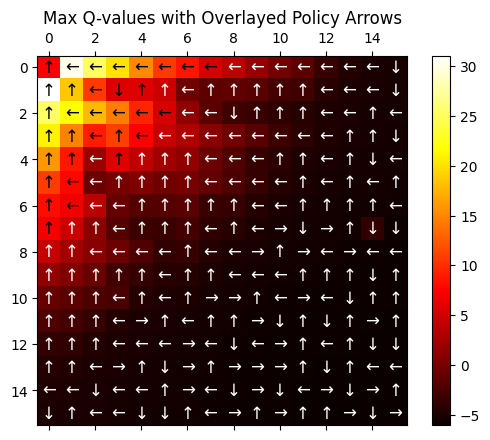

In [6]:
# Heatmap of Max Q-values for Each State
max_q_values = np.max(Q, axis=1).reshape((n, m))

# Directions: 0: up, 1: down, 2: left, 3: right
arrow_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}
policy = np.argmax(Q, axis=1).reshape((n, m))

# Create combined visualization
fig, ax = plt.subplots()
cax = ax.matshow(max_q_values, cmap='hot')

# Overlay arrows
for i in range(n):
    for j in range(m):
        ax.text(j, i, arrow_map[policy[i, j]], ha='center', va='center', fontsize=12, color='black' if max_q_values[i, j] > 5 else 'white')

# Display colorbar
fig.colorbar(cax)
plt.title('Max Q-values with Overlayed Policy Arrows')
plt.show()

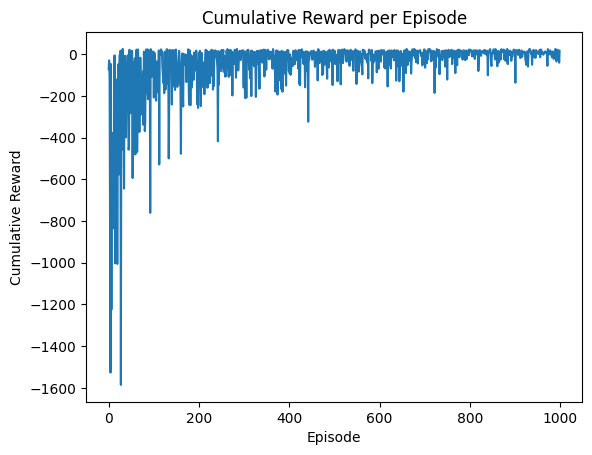

In [7]:
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Episode')
plt.show()